# Exploratory Data Analysis 

## Data Science, Machine Learning and Artificial Intelligence - by Farzad Minooei

### CRISP-DM Methodology

<div>
    <br>
<img src="CRISP-DM_Process_Diagram.png" width = "400" align = "left" />
</div>

### Business Understanding

Goal:

Apply analytics to predict secondary school student performance in STEM (Science, Technology, Engineering, and Mathematics)

Sample vs. Population

While the population encompasses all the individuals, items, or observations under study, the sample represents a subset chosen for analysis. 

Recognizing this disparity allows researchers to draw meaningful inferences about the larger group based on the characteristics of the sample.

### Initial Setup

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read data from file
data = pd.read_csv('cs_01.csv')
data.head()

,no,school,sex,age,address,p_status,m_edu,f_edu,m_job,f_job,...,study_time,failures,fam_sup,higher,internet,fam_rel,go_out,health,absences,final_grade
0,1,GP,F,18,U,A,4,4,at_home,teacher,...,2,0,no,yes,no,4,4,3,6,6
1,2,GP,F,17,U,T,1,1,at_home,other,...,2,0,yes,yes,yes,5,3,3,4,6
2,3,GP,F,15,U,T,1,1,at_home,other,...,2,3,no,yes,yes,4,2,3,10,10
3,4,GP,F,15,U,T,4,2,health,services,...,3,0,yes,yes,yes,3,2,5,2,15
4,5,GP,F,16,U,T,3,3,other,other,...,2,0,yes,yes,no,4,2,5,4,10


In [3]:
data.shape

(395, 21)

### Exploratory Data Analysis Check List

1: Understand data collection process

2: Document data set description (meta data)

3: Check for missing values

4: Univariate data analysis

5: Bivariate data analysis

#### 1: Understand Data Collection Process

Ref: 
    
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

#### 2: Document Data Set Description (Meta Data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   no           395 non-null    int64 
 1   school       395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   p_status     395 non-null    object
 6   m_edu        395 non-null    int64 
 7   f_edu        395 non-null    int64 
 8   m_job        395 non-null    object
 9   f_job        395 non-null    object
 10  travel_time  395 non-null    int64 
 11  study_time   395 non-null    int64 
 12  failures     395 non-null    int64 
 13  fam_sup      395 non-null    object
 14  higher       395 non-null    object
 15  internet     395 non-null    object
 16  fam_rel      395 non-null    int64 
 17  go_out       395 non-null    int64 
 18  health       395 non-null    int64 
 19  absences     395 non-null    

0 no: number

1 school: student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex: student's sex (binary: "F" - female or "M" - male)

3 age: student's age (numeric: from 15 to 22)

4 address: student's home address type (binary: "U" - urban or "R" - rural)

5 p_status: parent's cohabitation status (binary: "T" - living together or "A" - apart)

6 m_edu: mother's education (ordinal: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

7 f_edu: father's education (ordinal: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 m_job: mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

9 f_job: father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 travel_time: home to school travel time (ordinal: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - > 1 hour)

11 study_time: weekly study time (ordinal: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - > 10 hours)

12 failures: number of past class failures (numeric: n if 1 <= n < 3, else 4)

13 fam_sup: family educational support (binary: yes or no)

14 higher: wants to take higher education (binary: yes or no)

15 internet: Internet access at home (binary: yes or no)

16 fam_rel: quality of family relationships (ordinal: from 1 - very bad to 5 - excellent)

17 go_out: going out with friends (ordinal: from 1 - very low to 5 - very high)

18 health: current health status (ordinal: from 1 - very bad to 5 - very good)

19 absences: number of school absences (numeric: from 0 to 93)

20 final_grade: final grade for Math course (numeric: from 0 to 20, output target)


#### 3: Check for Missing Values

In [16]:
np.sum(data.isnull(), axis = 0)

no             0
school         0
sex            0
age            0
address        0
p_status       0
m_edu          0
f_edu          0
m_job          0
f_job          0
travel_time    0
study_time     0
failures       0
fam_sup        0
higher         0
internet       0
fam_rel        0
go_out         0
health         0
absences       0
final_grade    0
dtype: int64

#### 4: Univariate Data Analysis

In [19]:
#sex (categorical - binary), Check for imbalanced data
sex_freq = data['sex'].value_counts()
sex_freq

sex
F    208
M    187
Name: count, dtype: int64

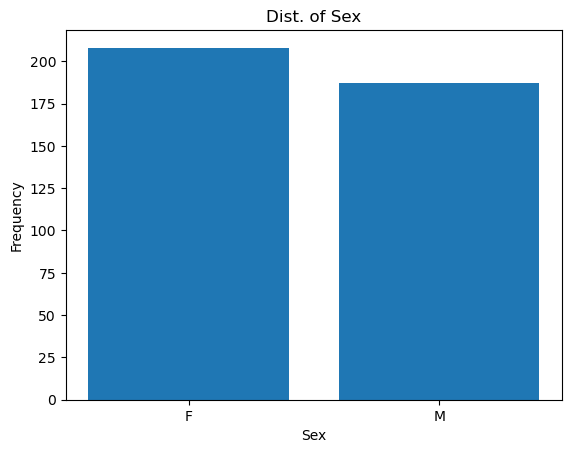

In [21]:
#Bar plot for sex
plt.bar(sex_freq.index, sex_freq.values)
plt.xticks(sex_freq.index)
plt.title('Dist. of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

In [23]:
#age (numerical)
data['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

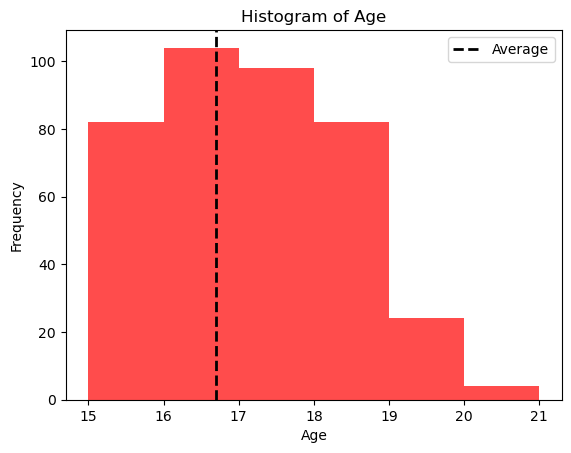

In [25]:
#Histogram for age
plt.hist(data['age'], bins = np.arange(data['age'].min(), 
                                       data['age'].max()),
         color = 'red', alpha = 0.7)
plt.axvline(data['age'].mean(), 
            color = 'black', linewidth = 2, 
            linestyle = '--', label = "Average")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:
#p_status (categorical - binary), check for imbalanced data
p_status_freq = data['p_status'].value_counts()
p_status_freq

p_status
T    354
A     41
Name: count, dtype: int64

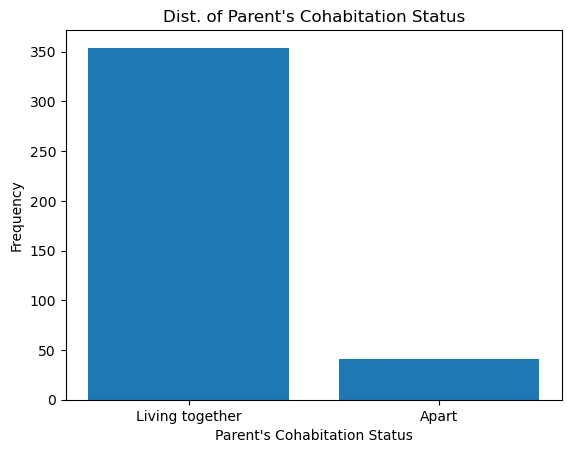

In [29]:
#Bar plot for cohabitation status
plt.bar(p_status_freq.index, p_status_freq.values)
plt.xticks(ticks = [0, 1], labels = ['Living together', 'Apart'])
plt.title("Dist. of Parent's Cohabitation Status")
plt.xlabel("Parent's Cohabitation Status")
plt.ylabel('Frequency')
plt.show()

In [31]:
#m_edu (categorical - ordinal)
m_edu_freq = data['m_edu'].value_counts()
m_edu_freq

m_edu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

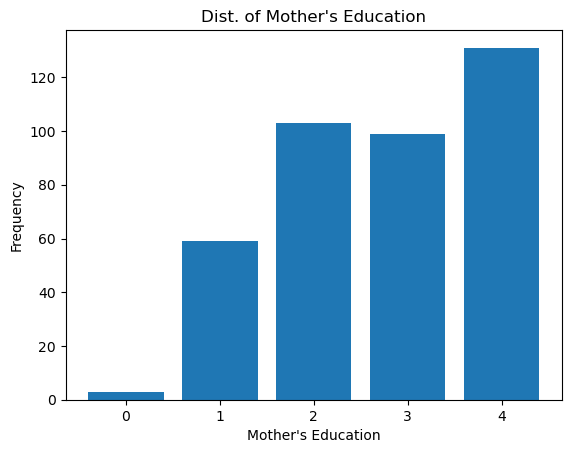

In [33]:
#Bar plot for m_edu
plt.bar(m_edu_freq.index, m_edu_freq.values)
plt.xticks(m_edu_freq.index)
plt.title("Dist. of Mother's Education")
plt.xlabel("Mother's Education")
plt.ylabel('Frequency')
plt.show()

In [35]:
#m_job (categorical - nominal)
m_job_freq = data['m_job'].value_counts()
m_job_freq

m_job
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

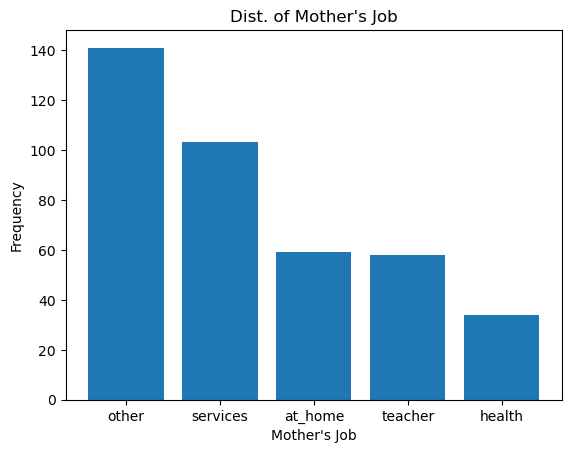

In [37]:
#Bar plot for m_job
plt.bar(m_job_freq.index, m_job_freq.values)
plt.xticks(m_job_freq.index)
plt.title("Dist. of Mother's Job")
plt.xlabel("Mother's Job")
plt.ylabel('Frequency')
plt.show()

In [39]:
#absences (numerical)
data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

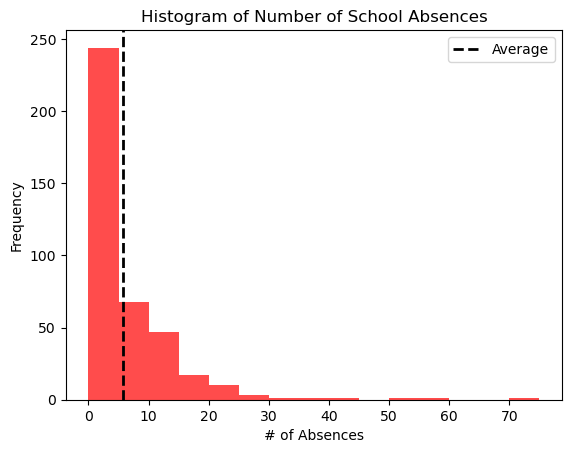

In [41]:
#Histogram for absences
plt.hist(data['absences'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(data['absences'].mean(), 
            color = 'black', linewidth = 2, 
            linestyle = '--', label = "Average")
plt.title('Histogram of Number of School Absences')
plt.xlabel('# of Absences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

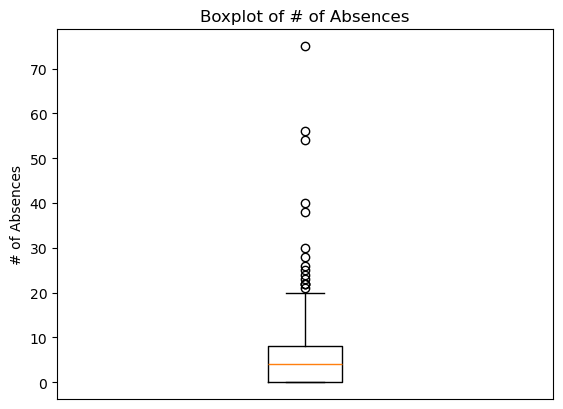

In [43]:
#Box Plot
plt.boxplot(data['absences'])
plt.title('Boxplot of # of Absences')
plt.xticks([]) #remove the xticks 
plt.ylabel('# of Absences')
plt.show()

In [45]:
#final_grade (numerical)
data['final_grade'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64

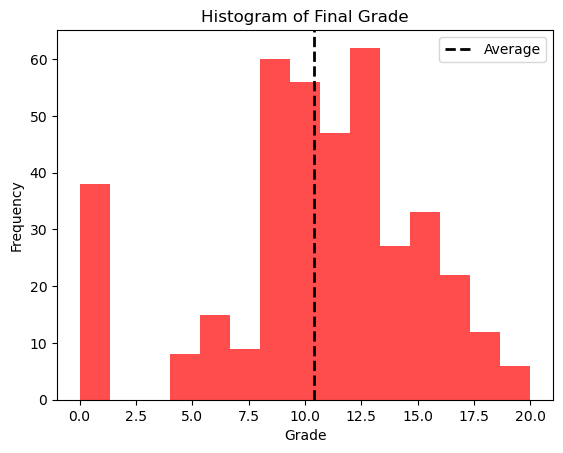

In [47]:
#Histogram for final_grade
plt.hist(data['final_grade'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(data['final_grade'].mean(), 
            color = 'black', linewidth = 2, 
            linestyle = '--', label = "Average")
plt.title('Histogram of Final Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [49]:
#The number of students with final grade equals 0
np.sum(data['final_grade'] == 0)

38

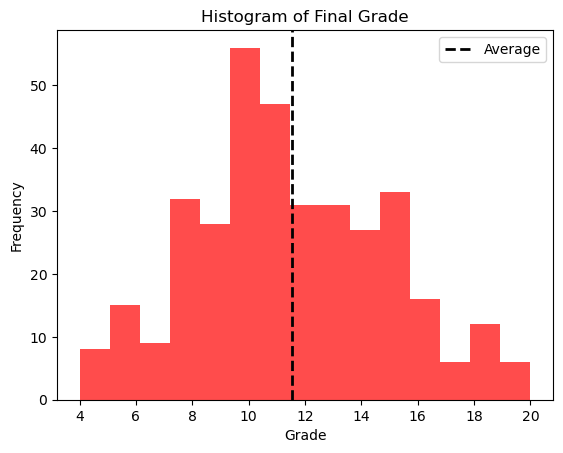

In [51]:
#Histogram for final_grade (greater than zero)
positive_grade = data.loc[data['final_grade'] > 0, :]
plt.hist(positive_grade['final_grade'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(positive_grade['final_grade'].mean(), 
            color = 'black', linewidth = 2, 
            linestyle = '--', label = "Average")
plt.title('Histogram of Final Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Probability Density Function (PDF):

The probability density function is nonnegative everywhere, and the area under the entire curve is equal to 1.

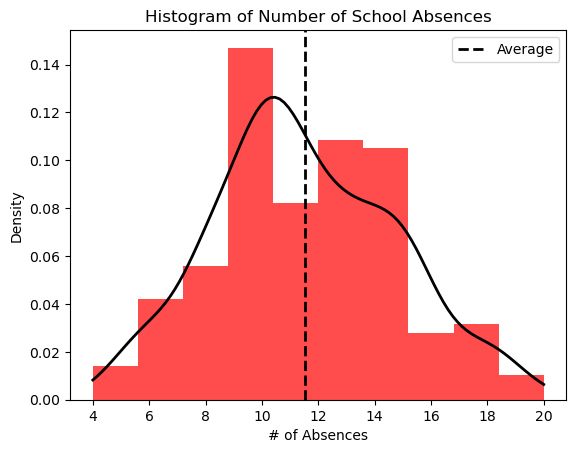

In [54]:
#Check for normality of final_grade

#Step 1: Histogram w/ density plot
#Calculate density
from scipy import stats
density = stats.gaussian_kde(positive_grade['final_grade'])
xp = np.linspace(positive_grade['final_grade'].min(), 
                 positive_grade['final_grade'].max(), 100)
yp = density.pdf(xp)

#Histogram
plt.hist(positive_grade['final_grade'], bins = 10, 
         color = 'red', alpha = 0.7, density = True)
plt.axvline(positive_grade['final_grade'].mean(), 
            color = 'black', linewidth = 2, 
            linestyle = '--', label = "Average")
plt.title('Histogram of Number of School Absences')
plt.xlabel('# of Absences')
plt.ylabel('Density')
#Add pdf curve
plt.plot(xp, yp, color = 'black', linewidth = 2)
plt.legend()
plt.show()

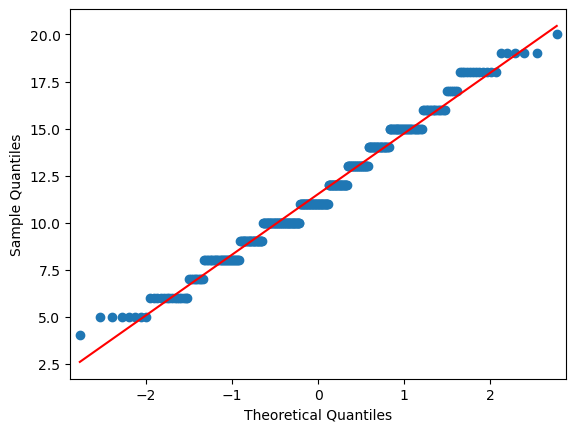

In [56]:
#Step 2: qq-plot
sm.qqplot(positive_grade['final_grade'], line = 's')
plt.show()
#Conclusion: data is normally distributed.

#### 5: Bivariate data analysis

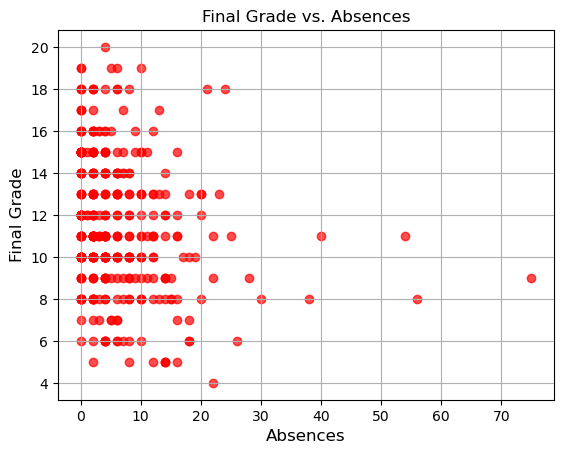

In [59]:
#Two continuous variables: final grade vs. absences
#Scatter plot
plt.scatter(x = positive_grade['absences'], 
            y = positive_grade['final_grade'], 
            color = 'red', alpha = 0.7)
plt.title('Final Grade vs. Absences')
plt.xlabel('Absences', fontsize = 12)
plt.ylabel('Final Grade', fontsize = 12)
plt.grid()
plt.show()

In [61]:
#Pearson correlation
positive_grade[['final_grade', 'absences']].corr(method = 'pearson')

,final_grade,absences
final_grade,1.000000,-0.213129
absences,-0.213129,1.000000


In [63]:
#Spearman correlation
positive_grade[['final_grade', 'absences']].corr(method = 'spearman')

,final_grade,absences
final_grade,1.000000,-0.244197
absences,-0.244197,1.000000


In [65]:
#Numerical vs categorical variables: final grade vs. p_status
positive_grade.groupby('p_status')['final_grade'].mean()

p_status
A    11.769231
T    11.493711
Name: final_grade, dtype: float64

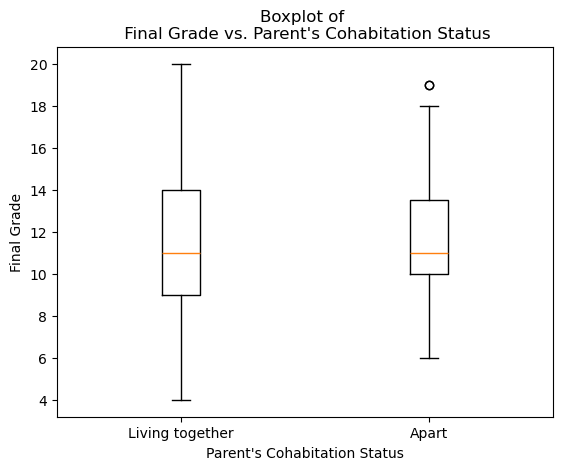

In [67]:
#Boxplot of final grade vs. p_status
plt.boxplot([positive_grade.loc[positive_grade['p_status'] == 'T', 
                                'final_grade'], 
             positive_grade.loc[positive_grade['p_status'] == 'A', 
                                'final_grade']])
plt.title("Boxplot of \n Final Grade vs. Parent's Cohabitation Status")
plt.xticks(ticks = [1, 2], labels = ['Living together', 'Apart'])
plt.xlabel("Parent's Cohabitation Status")
plt.ylabel('Final Grade')
plt.show()

In [69]:
#Numerical vs categorical variables: final grade vs. higher
positive_grade.groupby('higher')['final_grade'].mean()

higher
no      9.714286
yes    11.597668
Name: final_grade, dtype: float64

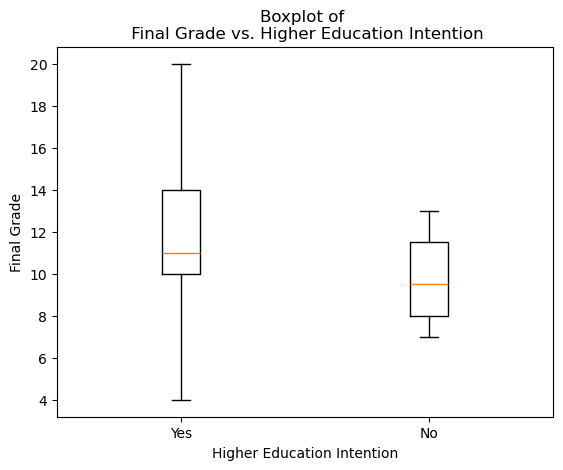

In [71]:
#Boxplot of final grade vs. higher
plt.boxplot([positive_grade.loc[positive_grade['higher'] == 'yes', 
                                'final_grade'], 
             positive_grade.loc[positive_grade['higher'] == 'no', 
                                'final_grade']])
plt.title('Boxplot of \n Final Grade vs. Higher Education Intention')
plt.xticks(ticks = [1, 2], labels = ['Yes', 'No'])
plt.xlabel('Higher Education Intention')
plt.ylabel('Final Grade')
plt.show()

In [73]:
#Two categorical variables: Cross Tabulation Analysis
#fam_sup vs. m_edu
cross_tab = pd.crosstab(positive_grade['fam_sup'], 
                        positive_grade['m_edu'])
cross_tab

m_edu,0,1,2,3,4
fam_sup,,,,,
no,2,26,39,34,37
yes,1,24,50,56,88


In [75]:
#Normalize over each column
cross_tab_pct = round(pd.crosstab(positive_grade['fam_sup'], 
                                  positive_grade['m_edu'], 
                                  normalize = 'columns'), 2)
cross_tab_pct

m_edu,0,1,2,3,4
fam_sup,,,,,
no,0.67,0.52,0.44,0.38,0.3
yes,0.33,0.48,0.56,0.62,0.7


# End of Code